In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')



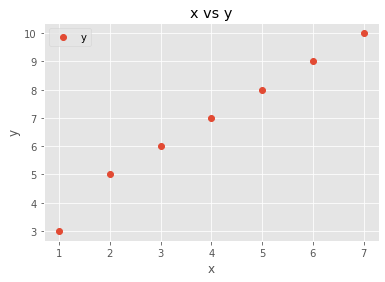

The value of the intercept: 2.2558139534883725
The value of the slope: 1.1511627906976745%.
This means for every one unit of change in x, the change in the y is about There is a positive relationship between the variables as the value of the slope is positive..
   Actual  Predicted
0    10.0  10.313953
1     6.0   5.709302
Mean Absolute Error: 0.3023255813953494
Mean Squared Error: 0.09153596538669587
Root Mean Squared Error: 0.3025491123548305
(7,)
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
(7,)
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]
The Akaike informatoin criterion is one of the most common methods of model selection. Lower AIC values indicate a better-fit model. In this case, Cubic Model is the best model for the given dataset. Because it has the lowest AIC value of -24.094772350694015.


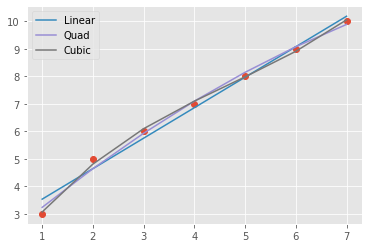

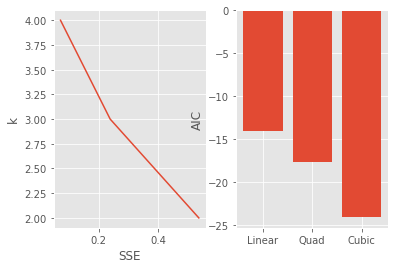

In [19]:
# Linear regression using Python ScikitLearn

# creating a dataset from user input

total_rows = int(input("Enter number of data rows:"))
header = input("Enter header (seperated using a comma; ex: variable1,variable2):")

data = []; i = 1

while i <= total_rows:
    row = input(f"Enter data for row {i} / {total_rows} (seperated using comma; ex: 1,2,3):")
    data.append(row)
    i += 1

header = header.split(',')

int_data = []

for i in data:
    tData = [float(x) for x in i.split(',')]
    int_data.append(tData)

df = pd.DataFrame(int_data, columns=header)

# Plot
df.plot(x = header[0], y = header[1], style='o')
plt.title(header[0] + ' vs ' + header [1])
plt.xlabel(header[0])
plt.ylabel(header[1])
plt.show()

# sns.regplot(x=df[header[0]], y=df[header[1]], color='red')

x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

from math import log10, floor
def round_sig(x, sig=2):
    if x > 0:
        return round(x, sig-int(floor(log10(abs(x))))-1)
    return x

# y-intercept (x=0)
intercept = regressor.intercept_
print(f"The value of the intercept: {intercept}")

def findRel(value):
    if value > 0:
        return "There is a positive relationship between the variables as the value of the slope is positive."
    elif value < 0:
        return "There is a negative relationship between the variables as the value of the slope is negative."
    else:
        return "There is no relationship between the variables."

# Slope
slope = regressor.coef_
print(f"The value of the slope: {slope[0]}%.\nThis means for every one unit of change in {header[0]}, the change in the {header[1]} is about {findRel(slope[0])}.")

# Prediction
y_pred = regressor.predict(X_test)
dataf = pd.DataFrame( {'Actual': y_test, 'Predicted': y_pred} )
print(dataf)

# Evaluation 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# AIC
xreshape = x.reshape(-1)

print(xreshape.shape)

A = np.ones( (total_rows, 2) )
print(A)
print(y.shape)
A[:,1] = xreshape

print(A)
c_linear = np.linalg.lstsq(A, y, rcond = -1)[0]
y_linear = A.dot(c_linear)  
SSE_linear = np.sum( (y - y_linear)**2 )

A = np.ones( (total_rows,3) )
A[:,1] = xreshape; 
A[:,2] = xreshape**2

c_quad = np.linalg.lstsq(A, y, rcond = -1)[0]
y_quad = A.dot(c_quad)
SSE_quad = np.sum( (y - y_quad)**2 )

A = np.ones( (total_rows,4) )
A[:,1] = xreshape; 
A[:,2] = xreshape**2
A[:,3] = xreshape**3

c_cubic = np.linalg.lstsq(A, y, rcond = -1)[0]
y_cubic = A.dot(c_cubic)
SSE_cubic = np.sum( (y - y_cubic)**2 )

fig = plt.figure(1); 
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'o');
ax.plot(x, y_linear, '-', label = 'Linear')
ax.plot(x, y_quad, '-', label = 'Quad');
ax.plot(x, y_cubic, '-', label = 'Cubic');
ax.legend();

SSE = np.array([ SSE_linear, SSE_quad, SSE_cubic])
k = np.array([2, 3, 4])
AIC = total_rows*np.log(SSE/total_rows) + 2*k
fig = plt.figure(); plt.clf()
ax = fig.add_subplot(121)
ax.plot(SSE, k)
ax.set_xlabel('SSE')
ax.set_ylabel('k');

ax2 = fig.add_subplot(1,2,2)
ax2.bar([1, 2, 3], AIC)
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Linear', 'Quad', 'Cubic'])
ax2.set_ylabel('AIC')

def findAIC():
    where = np.where(AIC == min(AIC))
    if (where[0] == [0]):
        return "Linear Model"
    elif (where[0] == [1]):
        return "Quadratic Model"
    else:
        return "Cubic Model"

print(f"The Akaike informatoin criterion is one of the most common methods of model selection. Lower AIC values indicate a better-fit model. In this case, {findAIC()} is the best model for the given dataset. Because it has the lowest AIC value of {min(AIC)}.")

     x       y
0 -2.0  5.5851
1 -1.8  5.7816
2 -1.6  1.0206
3 -1.4  1.5317
4 -1.2 -0.0862
               x          y
count  21.000000  21.000000
mean    0.000000   2.372938
std     1.240967   3.373360
min    -2.000000  -1.088700
25%    -1.000000  -0.404000
50%     0.000000   1.206100
75%     1.000000   4.921900
max     2.000000  11.503700


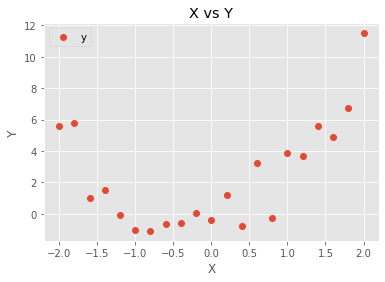

The value of the intercept: 1.8348020890001089
The value of the slope: 1.0515557066695684%.
This means for every one unit of change in x, the change in the y is about There is a positive relationship between the variables as the value of the slope is positive..
    Actual  Predicted
0  -0.5962   1.414180
1   3.2106   2.465736
2  11.5037   3.937914
3   5.7816  -0.057998
4   1.2061   2.045113
Mean Absolute Error: 3.399928440866064
Mean Squared Error: 19.328485107503518
Root Mean Squared Error: 4.3964173036125125
The Akaike informatoin criterion is one of the most common methods of model selection. Lower AIC values indicate a better-fit model. In this case, Quadratic Model is the best model for the given dataset. Because it has the lowest AIC value of 14.846703466365836.

<ipython-input-37-c3bfe06da376>:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


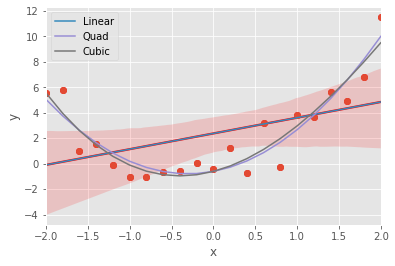

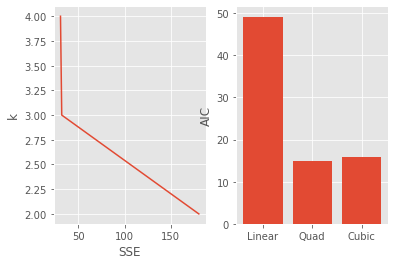

In [37]:
# dataset from csv file

dataset = pd.read_csv('data.csv')
print(dataset.head())
print(dataset.describe())


dataset.plot(x='x', y='y', style='o')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

intercept = regressor.intercept_
print(f"The value of the intercept: {intercept}")

def findRel(value):
    if value > 0:
        return "There is a positive relationship between the variables as the value of the slope is positive."
    elif value < 0:
        return "There is a negative relationship between the variables as the value of the slope is negative."
    else:
        return "There is no relationship between the variables."

slope = regressor.coef_
print(f"The value of the slope: {slope[0]}%.\nThis means for every one unit of change in {header[0]}, the change in the {header[1]} is about {findRel(slope[0])}.")

# Prediction
y_pred = regressor.predict(X_test)
dataf = pd.DataFrame( {'Actual': y_test, 'Predicted': y_pred} )
print(dataf)

# Evaluation 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.regplot(x='x', y='y', data=dataset, color='red')

# AIC
xreshape = X.reshape(-1)
A = np.ones( (21, 2) )
A[:,1] = xreshape

c_linear = np.linalg.lstsq(A, y, rcond = -1)[0]
y_linear = A.dot(c_linear)  
SSE_linear = np.sum( (y - y_linear)**2 )

A = np.ones( (21,3) )
A[:,1] = xreshape; 
A[:,2] = xreshape**2

c_quad = np.linalg.lstsq(A, y, rcond = -1)[0]
y_quad = A.dot(c_quad)
SSE_quad = np.sum( (y - y_quad)**2 )

A = np.ones( (21,4) )
A[:,1] = xreshape; 
A[:,2] = xreshape**2
A[:,3] = xreshape**3

c_cubic = np.linalg.lstsq(A, y, rcond = -1)[0]
y_cubic = A.dot(c_cubic)
SSE_cubic = np.sum( (y - y_cubic)**2 )

fig = plt.figure(1); 
ax = fig.add_subplot(1,1,1)
ax.plot(X, y, 'o');
ax.plot(X, y_linear, '-', label = 'Linear')
ax.plot(X, y_quad, '-', label = 'Quad');
ax.plot(X, y_cubic, '-', label = 'Cubic');
ax.legend();

SSE = np.array([ SSE_linear, SSE_quad, SSE_cubic])
k = np.array([2, 3, 4])
AIC = 21*np.log(SSE/21) + 2*k
fig = plt.figure(); plt.clf()
ax = fig.add_subplot(121)
ax.plot(SSE, k)
ax.set_xlabel('SSE')
ax.set_ylabel('k');

ax2 = fig.add_subplot(1,2,2)
ax2.bar([1, 2, 3], AIC)
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Linear', 'Quad', 'Cubic'])
ax2.set_ylabel('AIC')

def findAIC():
    where = np.where(AIC == min(AIC))
    if (where[0] == [0]):
        return "Linear Model"
    elif (where[0] == [1]):
        return "Quadratic Model"
    else:
        return "Cubic Model"

print(f"The Akaike informatoin criterion is one of the most common methods of model selection. Lower AIC values indicate a better-fit model. In this case, {findAIC()} is the best model for the given dataset. Because it has the lowest AIC value of {min(AIC)}.")

Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


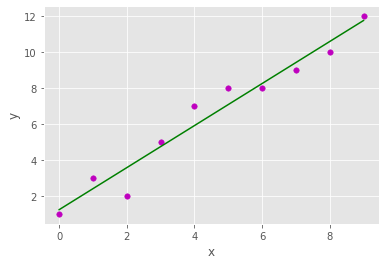

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print(f"Estimated coefficients:\nb_0 = {b[0]} \
		\nb_1 = {b[1]}")

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()
